# 1️⃣ Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2️⃣ Load Dataset

In [2]:
df = pd.read_csv("car_sales_data.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (50000, 7)
  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  
0   127300   3074  
1    57850  49704  
2    39190  24072  
3   210814   1705  
4   127869   4101  


# 3️⃣ Data Exploration (EDA)

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB
None
        Engine size  Year of manufacture        Mileage          Price
count  50000.000000         50000.000000   50000.000000   50000.000000
mean       1.773058          2004.209440  112497.320700   13828.903160
std        0.734108             9.645965   71632.515602   16416.681336
min        1.000000          1984.000000     630.000000      76.000000
25%        1.400000 

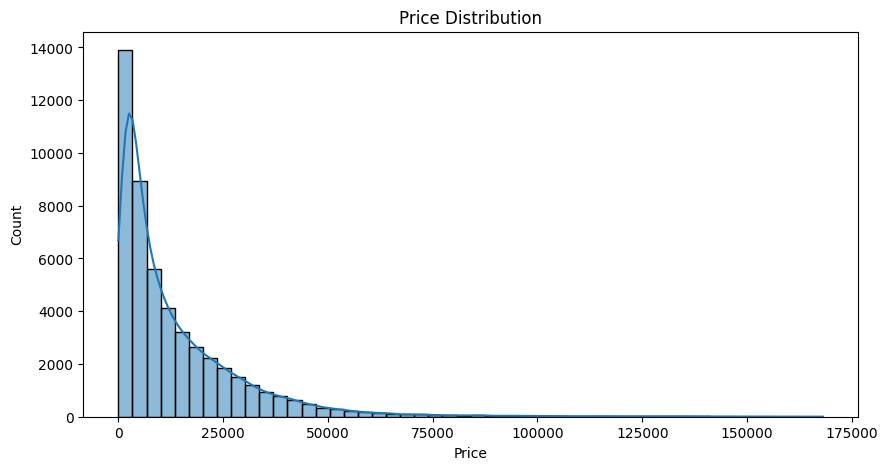

In [4]:
# Price Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

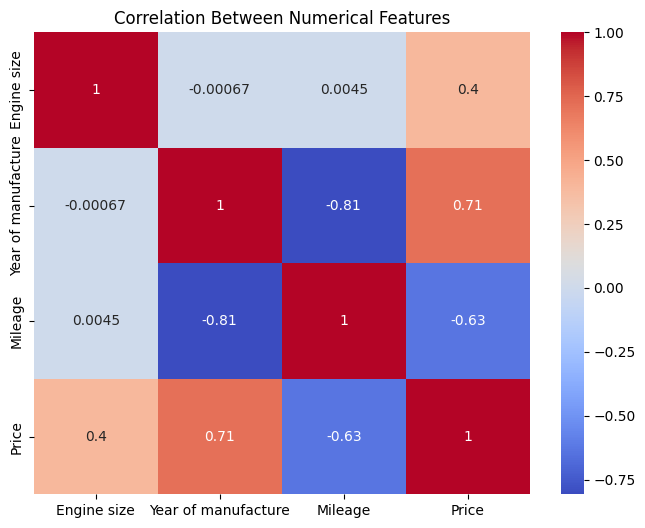

In [5]:
# Correlation Heatmap (numerical columns only)
num_cols = ['Engine size', 'Year of manufacture', 'Mileage', 'Price']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()

# 4️⃣ Data Cleaning

In [6]:
# Drop duplicates
df = df.drop_duplicates()

# Remove unrealistic values
df = df[(df['Year of manufacture'] >= 1980) & (df['Year of manufacture'] <= 2025)]
df = df[df['Mileage'] < 500000]

# 5️⃣ Feature Engineering

In [7]:
# Car Age Feature
df['Car_Age'] = 2025 - df['Year of manufacture']

# Optional: Log-transform of target if skewed
# df['Price'] = np.log1p(df['Price'])

# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Manufacturer', 'Fuel type'], drop_first=True)


# 6️⃣ Select Features & Target

In [8]:
features = ['Engine size', 'Mileage', 'Car_Age'] + \
           [col for col in df_encoded.columns if 'Manufacturer_' in col or 'Fuel type_' in col]
target = 'Price'

X = df_encoded[features]
y = df_encoded[target]

# 7️⃣ Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8️⃣ Model 1: Linear Regression

In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Linear Regression Metrics:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression Metrics:
R2 Score: 0.6944654220853864
MAE: 5882.8361885427585
RMSE: 9094.499294588099


# 9️⃣ Model 2: Random Forest Regressor

In [11]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Metrics:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Metrics:
R2 Score: 0.9816092338307334
MAE: 1024.4792517604797
RMSE: 2231.2514785712688


# 🔹 Feature Importance (Random Forest)

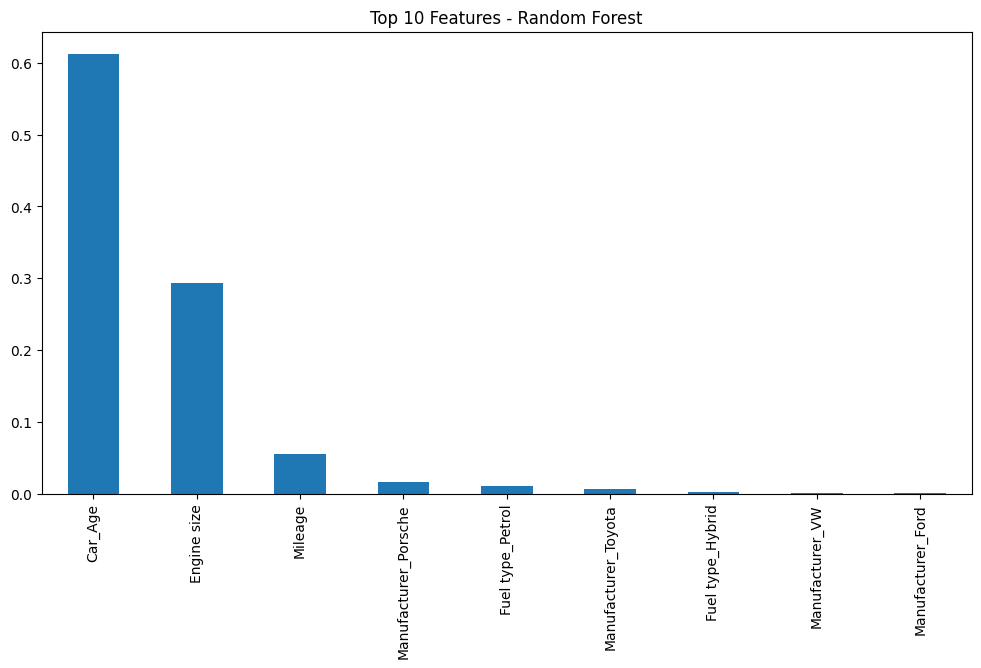

In [12]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Features - Random Forest")
plt.show()

# 10️⃣ Optional Visualizations

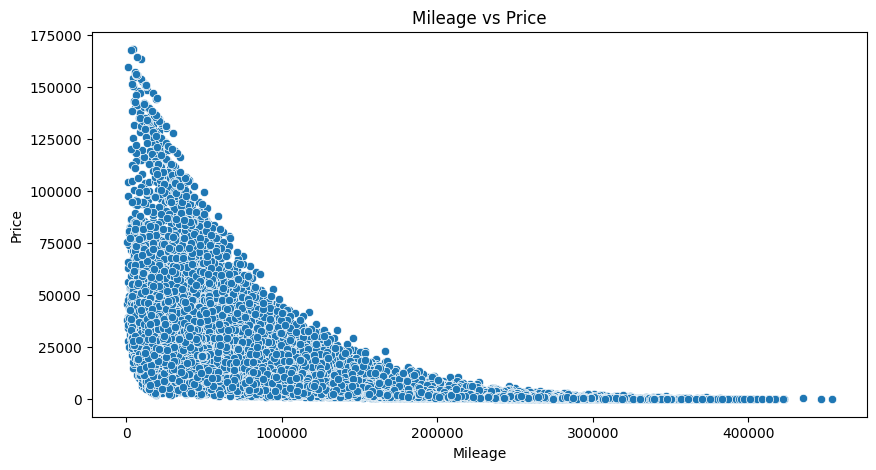

In [13]:
# Mileage vs Price
plt.figure(figsize=(10,5))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title("Mileage vs Price")
plt.show()

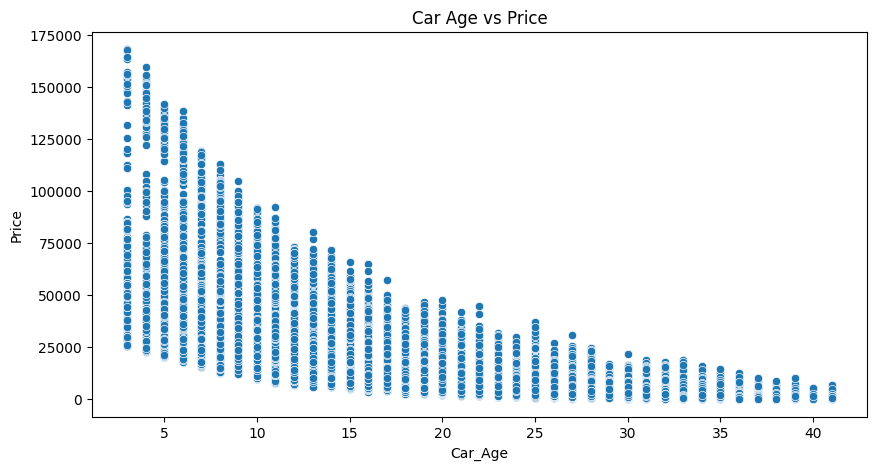

In [14]:
# Car Age vs Price
plt.figure(figsize=(10,5))
sns.scatterplot(x='Car_Age', y='Price', data=df)
plt.title("Car Age vs Price")
plt.show()